In [1]:
#comparative study of various methods for performong anamoly detection 
#project contains 2 main methods 
#Lstm(long-short term memory)
#it is one the classical deep learning method used on sequential data
#it is as an benchmark to compare other models 

#STOC(stacked transformer with 1-D CNN)
#it is a research based method that is used for anamoly detection 
#it is taken from research paper "time-series anomaly detection with stacked transformer representations and 1d convolutional network"
#the model performnce is used to compare with lstm performance 

In [2]:
# import tensorflow as tf

# # Set memory growth before TensorFlow initializes
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-analysis/climate_data.csv
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/LICENSE
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/.gitignore
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/main.py
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/README.md
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/results.txt
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/solver.py
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/model/attn.py
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/model/AnomalyTransformer.py
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/model/__init__.py
/kaggle/input/anamoly-transformer/pytorch/default/1/Anomaly-Transformer-main/model/embed.py
/kaggle/input/anamoly-transformer/pytorch/defaul

In [4]:
df=pd.read_csv('/kaggle/input/weather-analysis/climate_data.csv')

In [5]:
df

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


In [ ]:
# print(y_pred.shape)  # Debugging


In [ ]:
#light-weight-transformer model withe memeory optimized

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import gc  # Garbage collector for memory management
import warnings
warnings.filterwarnings('ignore')

# STEP 1: ADD MEMORY MONITORING FUNCTIONS (from previous artifact)
import psutil
import os

In [5]:
# STEP 1: ADD MEMORY MONITORING FUNCTIONS (from previous artifact)

def get_memory_usage():
    """Get current memory usage in GB"""
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()
    memory_gb = memory_info.rss / 1024**3
    return memory_gb

def print_memory_usage(label="", detailed=False):
    """Print current memory usage with optional label"""
    if detailed:
        process = psutil.Process(os.getpid())
        memory_info = process.memory_info()
        virtual_memory = psutil.virtual_memory()
        
        print(f"\n{'='*50}")
        print(f"🧠 DETAILED MEMORY REPORT - {label}")
        print(f"{'='*50}")
        print(f"📊 Process Memory: {memory_info.rss / 1024**3:.2f} GB ({memory_info.rss / 1024**2:.1f} MB)")
        print(f"🖥️  System Total:  {virtual_memory.total / 1024**3:.1f} GB")
        print(f"💾 System Free:   {virtual_memory.available / 1024**3:.1f} GB")
        print(f"📈 System Usage:  {virtual_memory.percent:.1f}%")
        print(f"{'='*50}")
    else:
        memory_gb = get_memory_usage()
        print(f"🧠 Memory Usage {label}: {memory_gb:.2f} GB ({memory_gb*1000:.0f} MB)")

def compare_memory(start_memory, current_label="Current"):
    """Compare current memory with starting memory"""
    current_memory = get_memory_usage()
    difference = current_memory - start_memory
    
    print(f"📈 Memory Comparison:")
    print(f"   Start:      {start_memory:.2f} GB")
    print(f"   {current_label:10}: {current_memory:.2f} GB")
    print(f"   Difference: {difference:+.2f} GB ({difference*1000:+.0f} MB)")
    
    if difference > 5:
        print("   ⚠️  WARNING: High memory usage detected!")
    elif difference > 0:
        print("   ℹ️  Memory usage increased")
    else:
        print("   ✅ Memory usage stable/decreased")

def memory_cleanup():
    """Perform memory cleanup"""
    print("🧹 Performing memory cleanup...")
    try:
        import tensorflow as tf
        tf.keras.backend.clear_session()
        print("   ✅ TensorFlow session cleared")
    except:
        pass
    collected = gc.collect()
    print(f"   ✅ Garbage collector freed {collected} objects")
    print_memory_usage("(After cleanup)")

# STEP 2: INITIAL MEMORY CHECK
print("🔍 INITIAL MEMORY CHECK")
initial_memory = get_memory_usage()
print_memory_usage("(Initial)", detailed=True)

print("Starting Memory-Optimized Weather Analysis...")

# Memory optimization functions
def optimize_dtypes(df):
    """Optimize DataFrame dtypes to reduce memory usage"""
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

🔍 INITIAL MEMORY CHECK

🧠 DETAILED MEMORY REPORT - (Initial)
📊 Process Memory: 0.81 GB (827.0 MB)
🖥️  System Total:  31.4 GB
💾 System Free:   29.7 GB
📈 System Usage:  5.3%
Starting Memory-Optimized Weather Analysis...


Loading data from: /kaggle/input/weather-analysis/climate_data.csv
Dataset shape: (3902, 23)
Available columns: ['Date', 'Average temperature (°F)', 'Average humidity (%)', 'Average dewpoint (°F)', 'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)', 'Average direction (°deg)', 'Rainfall for month (in)', 'Rainfall for year (in)', 'Maximum rain per minute', 'Maximum temperature (°F)', 'Minimum temperature (°F)', 'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure', 'Minimum pressure', 'Maximum windspeed (mph)', 'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'Date1', 'Month', 'diff_pressure']

First 5 rows:
         Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05

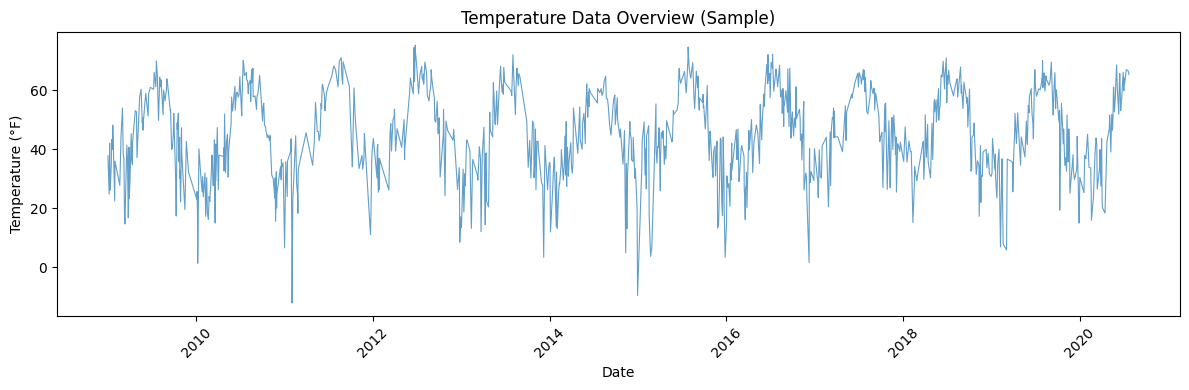

In [6]:
def load_and_preprocess_data(file_path):
    """Load data with memory optimization"""
    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path)
    
    # Display first few rows and column info
    print(f"Dataset shape: {df.shape}")
    print("Available columns:", df.columns.tolist())
    print("\nFirst 5 rows:")
    print(df.head())
    
    if 'Average temperature (°F)' in df.columns:
        df = df[['Date', 'Average temperature (°F)']].copy()
    else:
        print("❌ Column 'Average temperature (°F)' not found!")
        raise ValueError("Column 'Average temperature (°F)' not found!")
    
    # Optimize data types
    df = optimize_dtypes(df)
    
    # Convert Date column (handle your specific datetime format)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Remove any potential duplicates or missing values
    initial_len = len(df)
    df = df.dropna()
    df = df.drop_duplicates(subset=['Date'])
    
    if len(df) < initial_len:
        print(f"⚠️  Removed {initial_len - len(df)} rows (duplicates/missing values)")
    
    # Sort by date to ensure chronological order
    df = df.sort_values('Date').reset_index(drop=True)
    
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
    print(f"📅 Date range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"🌡️  Temperature range: {df['Average temperature (°F)'].min():.1f}°F to {df['Average temperature (°F)'].max():.1f}°F")
    print(f"📊 Temperature stats:")
    print(f"   • Mean: {df['Average temperature (°F)'].mean():.1f}°F")
    print(f"   • Std:  {df['Average temperature (°F)'].std():.1f}°F")
    
    return df

# Load your climate data
try:
    df = load_and_preprocess_data('/kaggle/input/weather-analysis/climate_data.csv')
    print("✅ Climate data loaded successfully!")
    
    # STEP 3: MEMORY CHECK AFTER DATA LOADING
    print("\n🔍 MEMORY AFTER DATA LOADING")
    print_memory_usage("(After data loading)")
    print(f"DataFrame memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    compare_memory(initial_memory, "After Loading")
    
except FileNotFoundError:
    print("❌ Error: 'climate_data.csv' not found in current directory")
    raise
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

# Display basic info
print("\n" + "="*50)
print("DATA OVERVIEW")
print("="*50)
print(df.head())

# Simple visualization
plt.figure(figsize=(12, 4))
sample_data = df.sample(min(1000, len(df))).sort_values('Date')
plt.plot(sample_data['Date'], sample_data['Average temperature (°F)'], alpha=0.7, linewidth=0.8)
plt.title('Temperature Data Overview (Sample)')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Data preparation functions
def prepare_data_efficiently(df, look_back=20, train_ratio=0.8):
    """Prepare data with memory efficiency"""
    data = df['Average temperature (°F)'].values.astype(np.float32)
    print(f"Original data points: {len(data)}")
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    
    train_size = int(len(scaled_data) * train_ratio)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size - look_back:]
    
    print(f"Training data points: {len(train_data)}")
    print(f"Test data points: {len(test_data)}")
    
    return train_data, test_data, scaler

def create_test_sequences(data, look_back):
    """Create test sequences efficiently"""
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i])
        y.append(data[i])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)


In [8]:
# Prepare data
print("\n" + "="*50)
print("DATA PREPARATION")
print("="*50)

look_back = 20
train_data, test_data, scaler = prepare_data_efficiently(df, look_back=look_back)

# Create test sequences
X_test, y_test = create_test_sequences(test_data, look_back)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Test data shape: {X_test.shape}")
print(f"Test data memory: {X_test.nbytes / 1024**2:.2f} MB")

# STEP 4: MEMORY CHECK AFTER DATA PREPROCESSING
print("\n🔍 MEMORY AFTER DATA PREPROCESSING")
print_memory_usage("(After preprocessing)")
compare_memory(initial_memory, "After Prep")



DATA PREPARATION
Original data points: 3902
Training data points: 3121
Test data points: 801
Test data shape: (781, 20, 1)
Test data memory: 0.06 MB

🔍 MEMORY AFTER DATA PREPROCESSING
🧠 Memory Usage (After preprocessing): 0.82 GB (821 MB)
📈 Memory Comparison:
   Start:      0.81 GB
   After Prep: 0.82 GB
   Difference: +0.01 GB (+13 MB)
   ℹ️  Memory usage increased


In [9]:
# Transformer model creation (simplified version)
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

class MemoryEfficientTransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super(MemoryEfficientTransformerBlock, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate
        
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=dropout_rate)
        self.ffn1 = Dense(ff_dim, activation="gelu")
        self.ffn2 = Dense(embed_dim)
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        attn_output = self.attention(inputs, inputs, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn1(out1)
        ffn_output = self.ffn2(ffn_output)
        ffn_output = self.dropout2(ffn_output, training=training)
        
        return self.layernorm2(out1 + ffn_output)

def create_lightweight_transformer(input_shape, embed_dim=64, num_heads=4, ff_dim=128, num_layers=2, dropout_rate=0.1):
    """Create a memory-efficient Transformer model"""
    inputs = Input(shape=input_shape)
    
    if input_shape[-1] != embed_dim:
        x = Dense(embed_dim, activation='linear')(inputs)
    else:
        x = inputs
    
    for i in range(num_layers):
        x = MemoryEfficientTransformerBlock(
            embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, 
            dropout_rate=dropout_rate, name=f'transformer_block_{i}'
        )(x)
    
    x = GlobalAveragePooling1D()(x)
    x = Dense(32, activation='gelu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(16, activation='gelu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='linear')(x)
    
    model = Model(inputs, outputs, name='LightweightTransformer')
    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model


In [10]:
# Create model
print("\n" + "="*50)
print("MODEL CREATION")
print("="*50)

model = create_lightweight_transformer(input_shape=(look_back, 1))
print("✅ Memory-Efficient Transformer model created successfully!")
print("\n📋 Model Architecture:")
model.summary()

total_params = model.count_params()
print(f"\n📊 Model Parameters: {total_params:,}")
print(f"Estimated model memory: ~{total_params * 4 / 1024**2:.1f} MB")

# STEP 5: MEMORY CHECK AFTER MODEL CREATION
print("\n🔍 MEMORY AFTER MODEL CREATION")
print_memory_usage("(After model creation)")
compare_memory(initial_memory, "After Model")



MODEL CREATION
✅ Memory-Efficient Transformer model created successfully!

📋 Model Architecture:


Model: "LightweightTransformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20, 64)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_0                  │ (None, 20, 64)              │          33,472 │
│ (MemoryEfficientTransformerBlock)    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ (None, 20, 64)              │          33,472 │
│ (MemoryEfficientTransformerBlock)    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,697 (272.25 KB)

 Trainable params: 69,697 (272.25 KB)

 Non-trainable params: 0 (0.00 B)


📊 Model Parameters: 69,697
Estimated model memory: ~0.3 MB

🔍 MEMORY AFTER MODEL CREATION
🧠 Memory Usage (After model creation): 1.05 GB (1053 MB)
📈 Memory Comparison:
   Start:      0.81 GB
   After Model: 1.05 GB
   Difference: +0.25 GB (+246 MB)
   ℹ️  Memory usage increased


In [11]:
def train_model_with_full_data(model, train_data, look_back, batch_size=16, epochs=15):
    """Train model using full dataset with memory management"""
    total_samples = len(train_data) - look_back
    max_chunk_size = 3000
    
    if total_samples <= max_chunk_size:
        print(f"✅ Training with FULL dataset ({total_samples} samples) in single phase")
        X_train, y_train = create_test_sequences(train_data, look_back)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        
        # STEP 6: MEMORY CHECK DURING TRAINING
        print("\n🔍 MEMORY DURING TRAINING SETUP")
        print_memory_usage("(Training data ready)")
        
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
        
        del X_train, y_train
        gc.collect()
        return history
    else:
        print(f"📊 Training with FULL dataset ({total_samples} samples) in multiple phases")
        num_chunks = (total_samples + max_chunk_size - 1) // max_chunk_size
        history_combined = {'loss': [], 'val_loss': []}
        
        for chunk_idx in range(num_chunks):
            start_idx = chunk_idx * max_chunk_size
            end_idx = min(start_idx + max_chunk_size, total_samples)
            
            print(f"Training phase {chunk_idx + 1}/{num_chunks} (samples {start_idx} to {end_idx})")
            
            # STEP 6b: MEMORY CHECK FOR EACH CHUNK
            print(f"🔍 Memory before chunk {chunk_idx + 1}:")
            print_memory_usage(f"(Chunk {chunk_idx + 1})")
            
            chunk_data = train_data[start_idx:end_idx + look_back]
            X_chunk, y_chunk = create_test_sequences(chunk_data, look_back)
            X_chunk = X_chunk.reshape(X_chunk.shape[0], X_chunk.shape[1], 1)
            
            chunk_epochs = epochs // num_chunks + (1 if chunk_idx < epochs % num_chunks else 0)
            history = model.fit(X_chunk, y_chunk, epochs=chunk_epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
            
            history_combined['loss'].extend(history.history['loss'])
            if 'val_loss' in history.history:
                history_combined['val_loss'].extend(history.history['val_loss'])
            
            del X_chunk, y_chunk, chunk_data
            gc.collect()
        
        class MockHistory:
            def __init__(self, history_dict):
                self.history = history_dict
        
        return MockHistory(history_combined)


In [12]:
# Train the model
print("\n🚀 Starting Transformer training with FULL dataset...")
history = train_model_with_full_data(model, train_data, look_back, batch_size=16, epochs=15)

del train_data
gc.collect()

# STEP 7: MEMORY CHECK AFTER TRAINING
print("\n🔍 MEMORY AFTER TRAINING COMPLETION")
print_memory_usage("(After training)")
compare_memory(initial_memory, "After Training")

# Emergency memory check
current_memory = get_memory_usage()
if current_memory > 8.0:
    print("⚠️  HIGH MEMORY USAGE - PERFORMING EMERGENCY CLEANUP")
    memory_cleanup()

# Make predictions
print("\n" + "="*50)
print("TRANSFORMER ANOMALY DETECTION")
print("="*50)

print("Making predictions with Transformer model...")
y_pred = model.predict(X_test, batch_size=16, verbose=0)

# STEP 8: MEMORY CHECK AFTER PREDICTIONS
print("\n🔍 MEMORY AFTER PREDICTIONS")
print_memory_usage("(After predictions)")


🚀 Starting Transformer training with FULL dataset...
📊 Training with FULL dataset (3101 samples) in multiple phases
Training phase 1/2 (samples 0 to 3000)
🔍 Memory before chunk 1:
🧠 Memory Usage (Chunk 1): 1.05 GB (1054 MB)
Epoch 1/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - loss: 0.2035 - mae: 0.2737 - val_loss: 0.0395 - val_mae: 0.1559
Epoch 2/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0543 - mae: 0.1820 - val_loss: 0.0385 - val_mae: 0.1479
Epoch 3/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0496 - mae: 0.1747 - val_loss: 0.0390 - val_mae: 0.1548
Epoch 4/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0457 - mae: 0.1689 - val_loss: 0.0416 - val_mae: 0.1541
Epoch 5/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0472 - mae: 0.1691 - val_loss: 0.0443 - val_mae: 0.1719
Epoch 6/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0461 - mae: 0.1657 - val_loss: 0.0365 - val_mae: 0.1514
Epoch 7/8
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0491 - mae

✅ Transformer-based anomaly detection completed!
🎯 Model Type: Memory-Efficient Transformer
📊 Architecture: 69,697 parameters
🔍 Anomaly Detection Results:
   • Total data points analyzed: 781
   • Anomalies detected: 38
   • Anomaly rate: 4.87%
   • Detection threshold: 0.4524


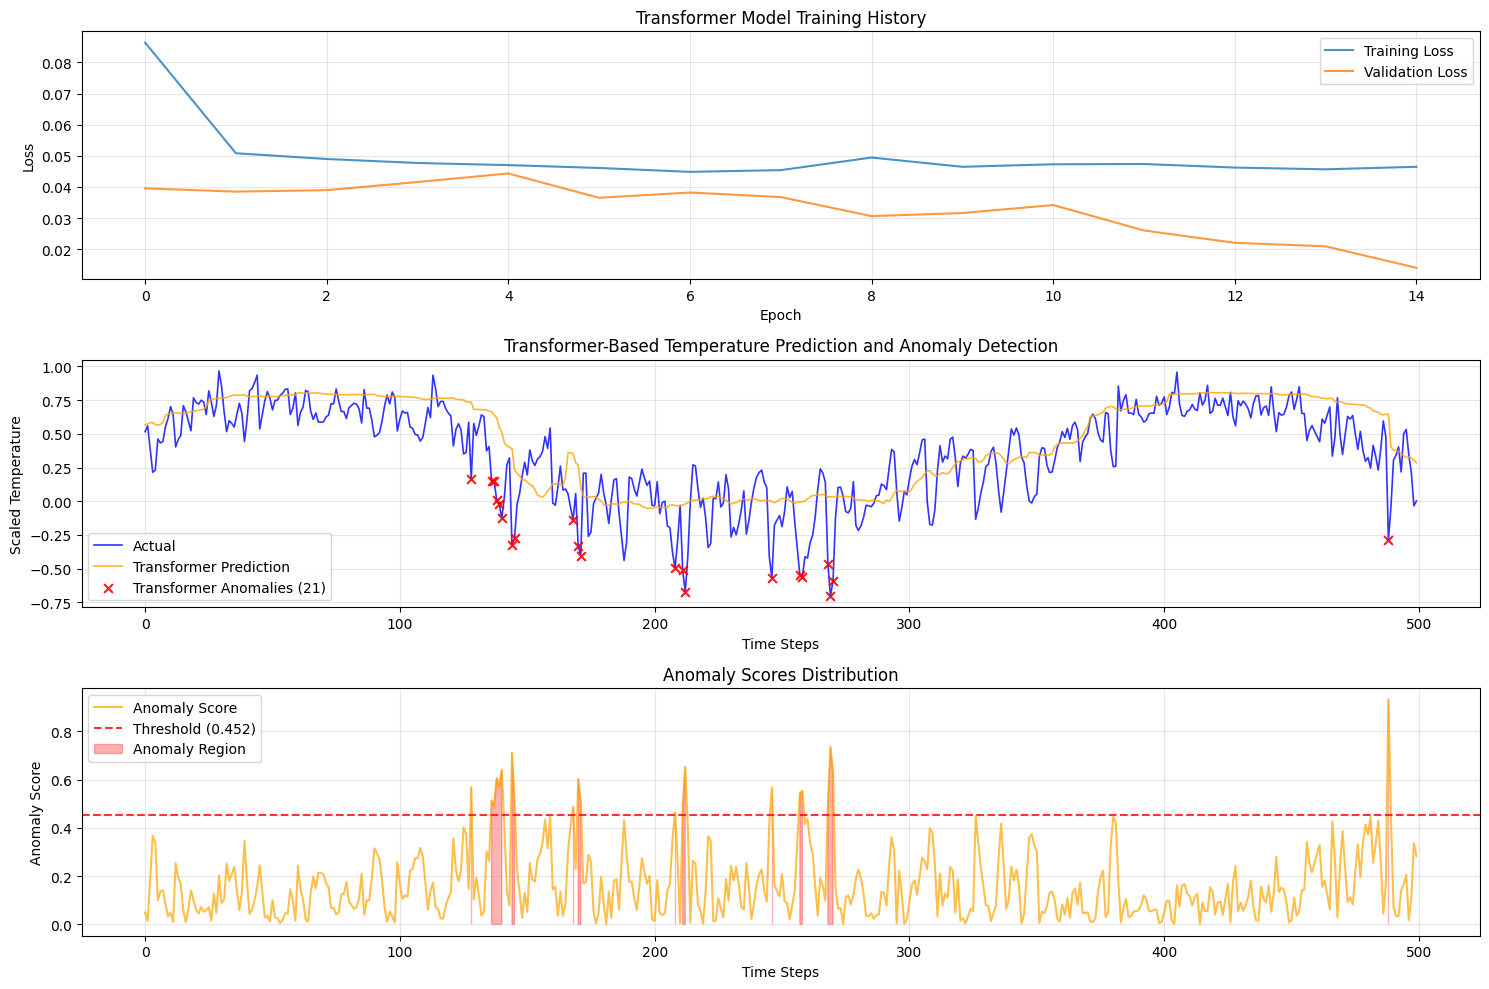

In [13]:
# Calculate anomaly scores
anomaly_scores = np.abs(y_pred.flatten() - y_test)
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)
anomalies = anomaly_scores > threshold

num_anomalies = np.sum(anomalies)
print(f"✅ Transformer-based anomaly detection completed!")
print(f"🎯 Model Type: Memory-Efficient Transformer")
print(f"📊 Architecture: {model.count_params():,} parameters")
print(f"🔍 Anomaly Detection Results:")
print(f"   • Total data points analyzed: {len(y_test):,}")
print(f"   • Anomalies detected: {num_anomalies:,}")
print(f"   • Anomaly rate: {num_anomalies/len(y_test)*100:.2f}%")
print(f"   • Detection threshold: {threshold:.4f}")

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', alpha=0.8)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', alpha=0.8)
plt.title('Transformer Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plot_range = min(500, len(y_test))
plot_indices = np.arange(plot_range)

plt.plot(plot_indices, y_test[:plot_range], label='Actual', alpha=0.8, linewidth=1.2, color='blue')
plt.plot(plot_indices, y_pred[:plot_range], label='Transformer Prediction', alpha=0.8, linewidth=1.2, color='orange')

anomaly_indices = np.where(anomalies[:plot_range])[0]
if len(anomaly_indices) > 0:
    plt.scatter(anomaly_indices, y_test[anomaly_indices], 
               color='red', label=f'Transformer Anomalies ({len(anomaly_indices)})', s=40, alpha=0.9, zorder=5, marker='x')

plt.title('Transformer-Based Temperature Prediction and Anomaly Detection')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(plot_indices, anomaly_scores[:plot_range], label='Anomaly Score', color='orange', alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.3f})', alpha=0.8)
plt.fill_between(plot_indices, 0, anomaly_scores[:plot_range], 
                 where=(anomaly_scores[:plot_range] > threshold), 
                 color='red', alpha=0.3, label='Anomaly Region')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Time Steps')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print("\n🔍 MEMORY BEFORE FINAL CLEANUP")
print_memory_usage("(Before cleanup)")

# Final cleanup and summary
print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)

memory_cleanup()

# STEP 10: FINAL MEMORY CHECK
print("\n🔍 FINAL MEMORY CHECK")
print_memory_usage("(Final)", detailed=True)
compare_memory(initial_memory, "Final")

print(f"✅ Transformer-based analysis completed successfully!")
print(f"🤖 Model Architecture: Memory-Efficient Transformer")
print(f"📈 Final Results:")
print(f"   - Parameters: {model.count_params():,}")
print(f"   - Mean Absolute Error: {np.mean(anomaly_scores):.4f}")
print(f"   - Anomaly Detection Rate: {num_anomalies/len(y_test)*100:.2f}%")
print(f"   - Data Points Processed: {len(y_test):,}")

print("\n🎉 Transformer-based anomaly detection completed with full memory monitoring!")


🔍 MEMORY BEFORE FINAL CLEANUP
🧠 Memory Usage (Before cleanup): 1.67 GB (1665 MB)

ANALYSIS COMPLETE
🧹 Performing memory cleanup...
   ✅ TensorFlow session cleared
   ✅ Garbage collector freed 0 objects
🧠 Memory Usage (After cleanup): 1.67 GB (1665 MB)

🔍 FINAL MEMORY CHECK

🧠 DETAILED MEMORY REPORT - (Final)
📊 Process Memory: 1.67 GB (1705.3 MB)
🖥️  System Total:  31.4 GB
💾 System Free:   28.9 GB
📈 System Usage:  7.8%
📈 Memory Comparison:
   Start:      0.81 GB
   Final     : 1.67 GB
   Difference: +0.86 GB (+858 MB)
   ℹ️  Memory usage increased
✅ Transformer-based analysis completed successfully!
🤖 Model Architecture: Memory-Efficient Transformer
📈 Final Results:
   - Parameters: 69,697
   - Mean Absolute Error: 0.1694
   - Anomaly Detection Rate: 4.87%
   - Data Points Processed: 781

🎉 Transformer-based anomaly detection completed with full memory monitoring!
